In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Concrete Cleaned Data.xlsx')
df.head()

,Number,Partner Name,Bill Date,Due Date,Total Signed,Amount Due,Payment Status,Payment Date
0,FAC/2024/00182,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,605.0,605.0,False,May2024
1,FAC/2024/00181,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,1595.0,1595.0,False,May2024
2,FAC/2024/00180,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-09,2024-05-09,1760.0,1760.0,False,May2024
3,FAC/2024/00178,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-08,2024-05-08,770.0,770.0,False,May2024
4,FAC/2024/00177,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-07,2024-05-07,1320.0,1320.0,False,May2024


In [3]:
df.shape

(765, 8)

C:\Users\dhimb\AppData\Local\Temp\ipykernel_8256\521391460.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Payment Date'] = pd.to_datetime(data['Payment Date'])


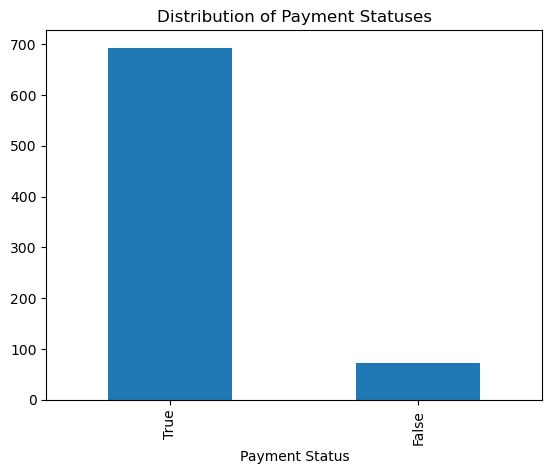

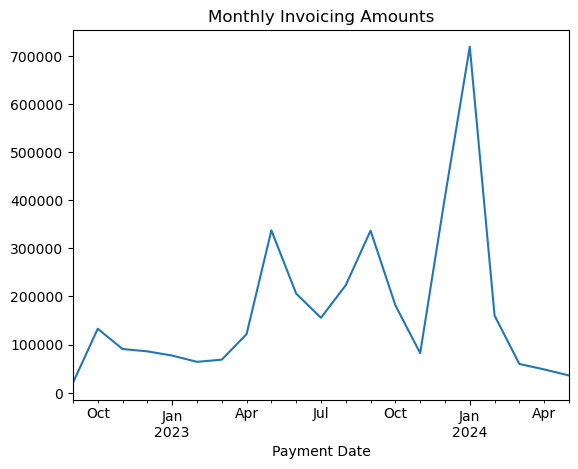

In [4]:
import pandas as pd

# Load data into a DataFrame
data = pd.read_excel('Concrete Cleaned Data.xlsx')

# Clean and preprocess data
data['Bill Date'] = pd.to_datetime(data['Bill Date'])
data['Due Date'] = pd.to_datetime(data['Due Date'])
data['Payment Date'] = pd.to_datetime(data['Payment Date'])
data['Total Signed'] = pd.to_numeric(data['Total Signed'], errors='coerce')

# Summary statistics
summary_stats = data.describe()

# Distribution of payment statuses
payment_status_counts = data['Payment Status'].value_counts()

# Time series analysis of invoicing amounts
data.set_index('Payment Date', inplace=True)
monthly_invoicing = data.resample('M')['Total Signed'].sum()

# Visualizations
import matplotlib.pyplot as plt

# Bar chart of payment statuses
payment_status_counts.plot(kind='bar')
plt.title('Distribution of Payment Statuses')
plt.show()

# Line graph of monthly invoicing
monthly_invoicing.plot()
plt.title('Monthly Invoicing Amounts')
plt.show()


In [8]:
## Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

# Prepare data for modeling
features = data[['Partner Name', 'Total Signed']]
labels = data['Payment Status']

# Encode categorical variables
features = pd.get_dummies(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.14      0.11      0.12         9
        True       0.95      0.96      0.95       144

    accuracy                           0.91       153
   macro avg       0.54      0.53      0.54       153
weighted avg       0.90      0.91      0.90       153

